In [15]:
import os
os.chdir(r'/Users/zhanghui/商业分析工具和应用/Python/Python_book/7Linearmodel')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

1.1简单线性回归

In [21]:
raw = pd.read_csv(r'creditcard_exp.csv', skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [22]:
exp = raw[raw['avg_exp'].notnull()].copy().iloc[:, 2:].drop('age2',axis=1)#用于建模
exp_new = raw[raw['avg_exp'].isnull()].copy().iloc[:, 2:].drop('age2',axis=1)#用于预测
exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


In [23]:
#相关性分析
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


说明Income和avg_exp有较高的相关性，可以使用简单的线性回归来建模

In [24]:
lm_s = ols('avg_exp ~ Income',data = exp).fit()
print(lm_s.params)

Intercept    258.049498
Income        97.728578
dtype: float64


In [25]:
lm_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.60e-10
Time:                        21:23:34   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pd.DataFrame([lm_s.predict(exp),lm_s.resid],index = ['predict','resid']).T.head()

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [27]:
lm_s.predict(exp_new)[:5]

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

1.2 多元线性回归

In [28]:
lm_m = ols('avg_exp ~ Age+Income+dist_home_val+dist_avg_income',data = exp).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     19.20
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.82e-10
Time:                        21:31:03   Log-Likelihood:                -498.59
No. Observations:                  70   AIC:                             1007.
Df Residuals:                      65   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -32.0078    186.874     -0.171      0.865    -405.221     341.206
Age                 1.3723      5.605      0.245      0.807      -9.822      12.566
Income           -166.7204     87.607     -1.903      0.061    -341.684       8.243
dist_home_val       1.5329      1.057      1.450      0.152      -0.578       3.644
dist_avg_income   261.8827     87.807      2.982      0.004      86.521     437.245
==============================================================================
Omnibus:                        5.234   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                5.174
Skew:                           0.625   Prob(JB):                       0.0752
Kurtosis:                       2.540   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

结果可知，只有Income和dist_avg_income的回归系数显著，其他都不显著

多元回归变量筛选

In [29]:

#向前回归法
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return(model)

In [31]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
lm_m = forward_select(data = data_for_select, response = 'avg_exp')
print(lm_m.rsquared)

aic is 1007.6801413968115,continuing!
aic is 1005.4969816306302,continuing!
aic is 1005.2487355956046,continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income + Income + dist_home_val 
0.541151292841195


可见，前向法删除了一个变量Age，而且R方没有明显的下降。

2 线性回归诊断
多元线性回归有很多前提条件：
自变量与因变量要有线性关系；
残差独立且服从正态分布；
因变量与残差不能有线性关系；
自变量之间不能有太强的线性关系。

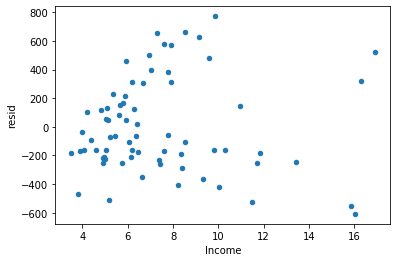

In [32]:
#残差分析
ana1 = lm_s
exp['Pred'] = ana1.predict(exp)
exp['resid'] = ana1.resid
exp.plot('Income','resid',kind = 'scatter')
plt.show()
#结果有方差不齐的问题

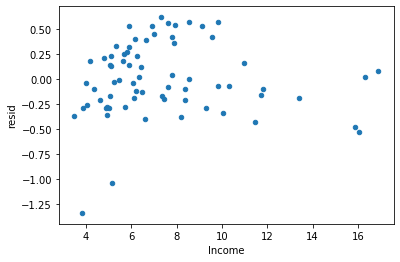

In [33]:
#对被解释变量取对数并重新建模
ana2 = ols('avg_exp_ln ~ Income',exp).fit()
exp['Pred'] = ana2.predict(exp)
exp['resid'] = ana2.resid
exp.plot('Income','resid',kind = 'scatter')
plt.show()

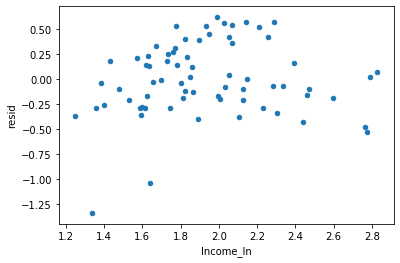

In [34]:
exp['Income_ln'] = np.log(exp['Income'])
ana3 = ols('avg_exp_ln ~ Income_ln',exp).fit()
exp['Pred'] = ana2.predict(exp)
exp['resid'] = ana2.resid
exp.plot('Income_ln','resid',kind = 'scatter')
plt.show()

In [35]:
r_sq = {'exp~Income':ana1.rsquared, 'ln(exp)~Income':ana2.rsquared, 
        'ln(exp)~ln(Income)':ana3.rsquared}
print(r_sq)

{'exp~Income': 0.45429062315565294, 'ln(exp)~Income': 0.403085555532965, 'ln(exp)~ln(Income)': 0.4803927993893108}


对收入和支出都取对数时，模型的R方时最大的。

In [37]:
#强影响点分析
exp['resid_t'] = (exp['resid'] - exp['resid'].mean()) / exp['resid'].std()
exp[abs(exp['resid_t']) > 2]

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,Pred,resid,Income_ln,resid_t
73,251.56,5.527682,0,29,5.1578,0,0,63.23,5.492947,-0.335147,0,6.565198,-1.037516,1.640510,-2.820981
98,163.18,5.094854,0,22,3.8159,0,0,63.27,3.997789,-0.181889,0,6.433436,-1.338582,1.339177,-3.639570


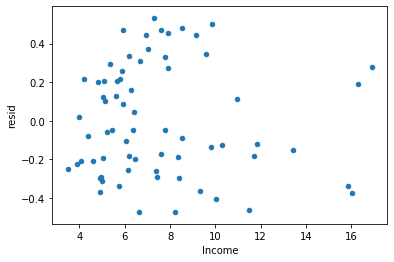

In [38]:
# Drop outlier
exp2 = exp[abs(exp['resid_t']) <= 2].copy()
ana4 = ols('avg_exp_ln ~ Income_ln', exp2).fit()
exp2['Pred'] = ana4.predict(exp2)
exp2['resid'] = ana4.resid
exp2.plot('Income', 'resid', kind='scatter')
plt.show()

In [39]:
ana4.rsquared

0.49397191385172456

In [40]:
# statemodels包提供了更多强影响点判断指标

from statsmodels.stats.outliers_influence import OLSInfluence

OLSInfluence(ana3).summary_frame().head()

,dfb_Intercept,dfb_Income_ln,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.343729,-0.381393,0.085587,-1.319633,0.089498,-0.413732,-1.326996,-0.416040
1,0.307196,-0.341294,0.069157,-1.201699,0.087409,-0.371907,-1.205702,-0.373146
3,0.207619,-0.244956,0.044984,-1.440468,0.041557,-0.299947,-1.452165,-0.302382
4,0.112301,-0.127713,0.010759,-0.575913,0.060926,-0.146693,-0.573062,-0.145967
5,0.120572,-0.150924,0.022274,-1.221080,0.029011,-0.211064,-1.225579,-0.211842


3多重共线性分析

In [41]:
exp2['dist_home_val_ln'] = np.log(exp2['dist_home_val'])
exp2['dist_avg_income_ln'] = np.log(exp2['dist_avg_income'])

ana5 = ols('''avg_exp_ln ~ Age + Income_ln + 
           dist_home_val_ln + dist_avg_income_ln''', exp2).fit()
ana5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.79e-10
Time:                        22:07:57   Log-Likelihood:                -7.3496
No. Observations:                  68   AIC:                             24.70
Df Residuals:                      63   BIC:                             35.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6265      0.317     14.574      0.000       3.992       5.261
Age                   -0.0006      0.005     -0.117      0.907      -0.011       0.010
Income_ln             -0.1802      0.569     -0.317      0.752      -1.317       0.957
dist_home_val_ln       0.1258      0.058      2.160      0.035       0.009       0.242
dist_avg_income_ln     1.0093      0.612      1.649      0.104      -0.214       2.233
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.466
Skew:                           0.248   Prob(JB):                        0.291
Kurtosis:                       2.210   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#自定义计算方差膨胀值函数VIF
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)


In [43]:
exog = exp2[['Income_ln', 'dist_home_val_ln',
             'dist_avg_income_ln']]

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

Income_ln 	 36.653639058963186
dist_home_val_ln 	 1.053596313570258
dist_avg_income_ln 	 36.894876856102


Income_ln和dist_avg_income_ln的VIF都大于10，说明存在多重共线性.
使用“高出平均收入的比率”代替其中一个

In [45]:
exp2['high_avg_ratio'] = exp2['high_avg'] / exp2['dist_avg_income']

In [46]:
exog1 = exp2[['high_avg_ratio', 'dist_home_val_ln', 
              'dist_avg_income_ln']]

for i in exog1.columns:
    print(i, '\t', vif(df=exog1, col_i=i))

high_avg_ratio 	 1.1230220802048871
dist_home_val_ln 	 1.0527009887483536
dist_avg_income_ln 	 1.1762825351755395


3正则化方法-解决多重共线性
岭回归
LASSO回归-可进行变量筛选

岭回归

In [50]:
#L1_wt = 0为岭回归，=1位LASSO回归

lmr = ols('avg_exp ~ Income + dist_home_val + dist_avg_income',
          data=exp).fit_regularized(alpha=1, L1_wt=0)
lmr.summary() #运行不正常

In [57]:
#使用scikit-learn进行岭回归参数选择
#标准化
from sklearn.preprocessing import StandardScaler
continuous_xcols = ['Age', 'Income', 'dist_home_val', 
                    'dist_avg_income']
scaler = StandardScaler()
X = scaler.fit_transform(exp[continuous_xcols])
y = exp['avg_exp_ln']

In [59]:
#正则化

from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 3, 100, base=10)

# Search the min MSE by CV
rcv = RidgeCV(alphas=alphas, store_cv_values=True) 
rcv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-0...
       1.09749877e+02, 1.23284674e+02, 1.38488637e+02, 1.55567614e+02,
       1.74752840e+02, 1.96304065e+02, 2.20513074e+02, 2.47707636e+02,
       2.78255940e+02, 3.12571585e+02, 3.51119173e+02, 3.94420606e+02,
       4.43062146e+02, 4.97702356e+02, 5.59081018e+02, 6.28029144e+02,
       7.05480231e+02, 7.92482898e+02, 8.90215085e+02, 1.00000000e+03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [60]:
print('The best alpha is {}'.format(rcv.alpha_))
print('The r-square is {}'.format(rcv.score(X, y))) 

The best alpha is 0.2915053062825176
The r-square is 0.4756826777019494


In [61]:
#用训练后的rcv模型来预测
X_new = scaler.transform(exp_new[continuous_xcols])
np.exp(rcv.predict(X_new)[:5])

array([759.67677561, 606.74024213, 661.20654568, 681.888929  ,
       641.06967182])

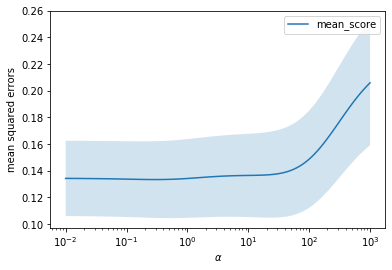

In [62]:
#可视化rcv正则化系数
cv_values = rcv.cv_values_
n_fold, n_alphas = cv_values.shape

cv_mean = cv_values.mean(axis=0)
cv_std = cv_values.std(axis=0)
ub = cv_mean + cv_std / np.sqrt(n_fold)
lb = cv_mean - cv_std / np.sqrt(n_fold)

plt.semilogx(alphas, cv_mean, label='mean_score')
plt.fill_between(alphas, lb, ub, alpha=0.2)
plt.xlabel("$\\alpha$")
plt.ylabel("mean squared errors")
plt.legend(loc="best")
plt.show()


图中可见正则化系数40-50以下时，模型的均方误差相差不大，当正则化系数超过该阈值，则均方误差快速上升，因此从图中看出，正则化系数小于40或50，模型的拟合效果都还不错。

In [63]:
rcv.coef_

array([ 0.03321449, -0.30956185,  0.05551208,  0.59067449])

In [ ]:
Income的系数为负值，说明收入越高信用卡支出越小，显然有问题。
我们可以用岭迹图进一步分析。

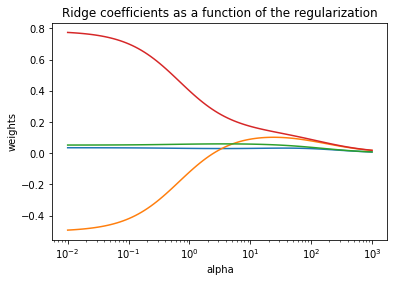

In [64]:
# 岭迹图

#将不同正则化系数下的变量系数保存下来
from sklearn.linear_model import Ridge

ridge = Ridge()

coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#绘制变量系数随正则化系数变化的轨迹
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In [65]:
#使用40作为正则化系数时，模型的变量系数如下
ridge.set_params(alpha=40)
ridge.fit(X, y)
ridge.coef_

array([0.03293109, 0.09907747, 0.04976305, 0.12101456])

In [66]:
#模型的R方
ridge.score(X, y)

0.4255673043353688

In [67]:
#预测结果
np.exp(ridge.predict(X_new)[:5])

array([934.79025945, 727.11042209, 703.88143602, 759.04342764,
       709.54172995])

LASSO回归

In [68]:

from sklearn.linear_model import LassoCV

lasso_alphas = np.logspace(-3, 0, 100, base=10)
lcv = LassoCV(alphas=lasso_alphas, cv=10) # Search the min MSE by CV
lcv.fit(X, y)

print('The best alpha is {}'.format(lcv.alpha_))
print('The r-square is {}'.format(lcv.score(X, y))) 
# Default score is rsquared

The best alpha is 0.04037017258596556
The r-square is 0.4426451069862233


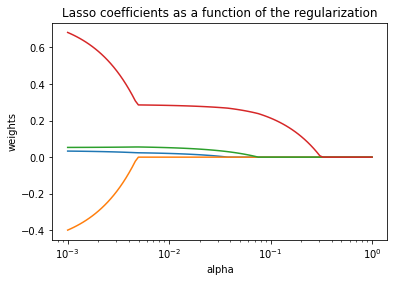

In [69]:
#不同正则化系数下的变量系数轨迹
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_coefs = []
for alpha in lasso_alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(lasso_alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In [70]:
lcv.coef_

array([0.        , 0.        , 0.02789489, 0.26549855])

#前两个变量被筛选掉了

In [71]:
np.exp(lasso.predict(X_new)[:5])

array([886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703])